In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats as stats
import seaborn as sns

# Capítulo 7

## Ejercicio 1

Así como dentro del módulo *Pandas* (pd) usamos la **clase** *Series*  o *DataFrame*, dentro del módulo *Statistics* usamos la clase *NormalDist*, que crea una distribución normal con los parámetros que le pasamos.

In [6]:
a = statistics.NormalDist(mu= 45.2, sigma= 10.4)
datos_ej1 = [55, 41, 45.2, 31.5, 68.4, 18.9]

z_score = [round(a.zscore(i),2) for i in datos_ej1]
z_score

[0.94, -0.4, 0.0, -1.32, 2.23, -2.53]

En este caso, *a* es una distribución normal (clase NormalDist), que como toda clase, tiene métodos. Uno de esos métodos es *zscore*, una función que permite calcular puntuaciones z en base a la distribución mencionada.

## Ejercicio 2

### Calular el área bajo la curva normal a la izquierda de determinado valor

Usamos la función cdf (cumulative distribution function o función de distribución acumulada) para calcular el área bajo la curva. La función de distribución acumulada es una versión más compleja del polígono de frecuencias relativas acumuladas que vimos en el capítulo 3. 

En el eje *y* se encuentra el porcentaje acumulado de datos hasta la calificación que correspondiente en el eje x (es decir, su **rango percentil**), lo cual equivale al área bajo la curva a la izquierda de dicha calificación.

In [7]:
from scipy.stats import norm

valores_z = [-2.05, -1.90, -0.25, 0.40, 1.65, 1.96, 2.33, 2.58, 3.08]

cdf_values = norm.cdf(valores_z)
for p in cdf_values:
    print(round(p, 4))

0.0202
0.0287
0.4013
0.6554
0.9505
0.975
0.9901
0.9951
0.999


### Calular el área bajo la curva normal a la derecha de determinado valor

In [6]:
valores_z = [-2.05, -1.90, -0.25, 0.40, 1.65, 1.96, 2.33, 2.58, 3.08]

cdf_values = norm.cdf(valores_z)
for p in cdf_values:
    print(round(1-p, 4)) # 1 es el total del área. Al restar p, nos queda el área a la derecha del número

0.9798
0.9713
0.5987
0.3446
0.0495
0.025
0.0099
0.0049
0.001


### Calcular el área bajo la curva normal entre la media y otro valor

### *Acá están las respuestas del ejercicio*

In [8]:
valores_z = [-2.05, -1.90, -0.25, 0.40, 1.65, 1.96, 2.33, 2.58, 3.08]

cdf_values = norm.cdf(valores_z)
for p in cdf_values:
    print(round(abs(p - norm.cdf(0)),4)) #norm.cdf(0) da el área bajo la curva correspondiente a la media de una distribución normal estándar

0.4798
0.4713
0.0987
0.1554
0.4505
0.475
0.4901
0.4951
0.499


### Calcular el área bajo la curva normal entre un valor y otro valor

In [8]:
pares_valores_z = [(-2.05, -0.25), (-1.90, 1.65), (1.96, 0.40), (2.33, 3.08)]

for par in pares_valores_z:
    print(round(abs(norm.cdf(par[0]) - norm.cdf(par[1])),2))

0.38
0.92
0.32
0.01


El valor absoluto, es decir, abs(), es necesario para que los resultados se expresen siempre en positivo:

- Para un z de 1,96, la cdf da 0.95 (área a la izquierda). Sabemos que hasta la media se cubre 0.5 del área total (1). Considere esta operación:

    0.95 - 0.5 = 0.45

    Esto es elemental. Al área restante bajo la curva (0.95) le saco otra parte (0.5) y tengo el área entre esos dos valores z.

- Pero fíjemonos ahora que pasa con -1.96. La cdf da 0.05. Entonces:

    0.05 - 0.5 = -0.45

    Acá necesitamos el módulo del valor porque el área (que expresa probabilidad) nunca puede ser negativa.

### Gráfica de la curva de probabilidad acumulada

Veamos gráficamente qué es la curva cdf. Las curvas cdf no tienen todas la misma forma. La que se ve abajo es la correspondiente a la curva normal estándar. 

Para que se pueda graficar primero hay que pasarle números a la función *norm.cdf()*. Cuantos más sean, mejor, porque más fiel representará a la distribución continua de valores. Usamos *np.linspace* para generar valores, pero se le puede pasar cualquier valor. 

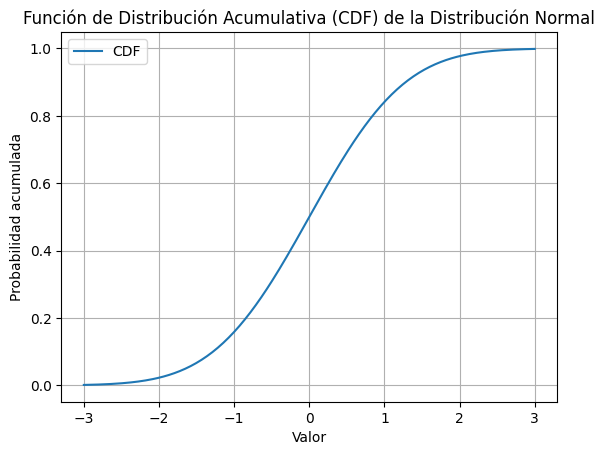

In [9]:
# Generar valores de x 
# El intervalo/salto lo calcula según la cantidad de valores que le doy
x = np.linspace(-3, 3, 250)
cdf_values = norm.cdf(x) # Si no se especifica nada, la media es 0 y el desvío estándar es 1

# Graficar la CDF
plt.plot(x, cdf_values, label='CDF')
plt.title('Función de Distribución Acumulativa (CDF) de la Distribución Normal')
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()

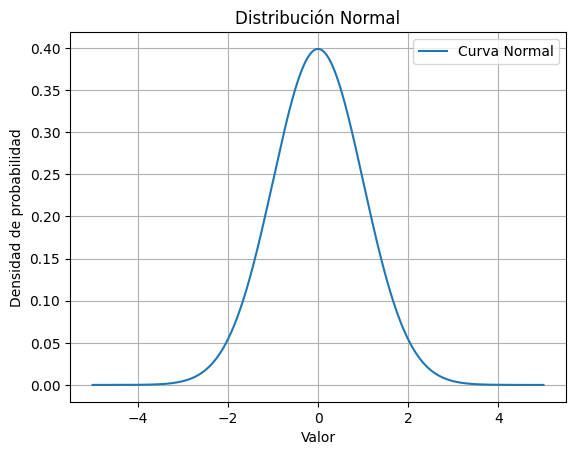

In [10]:
# Definir la media y la desviación estándar
media = 0
desviacion_estandar = 1 # Esto lo hace más angosto o más ancho

# Generar valores x para el eje x
x = np.linspace(-5, 5, 1000)

# Calcular los valores de la curva normal para los valores x
y = norm(loc=media, scale=desviacion_estandar).pdf(x)

# Graficar la curva normal
plt.plot(x, y, label='Curva Normal')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal')
plt.legend()
plt.grid(True)
plt.show()



## Ejercicio 3

A efectos ilustrativos, vamos a graficar la curva primero

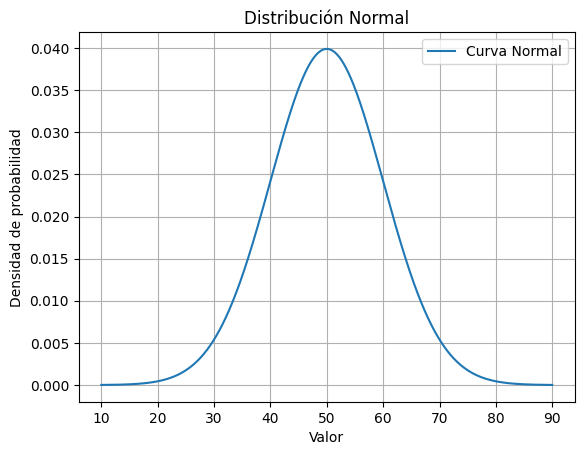

In [11]:
media3= 50
std_dev3= 10

# Generar valores x para el eje x
datos = np.linspace(media3 - 4 * std_dev3, media3 + 4 * std_dev3, 1000)
# 4 porque así cubrimos toda la extensión de la curva

# Calcular los valores de la curva normal para los valores x
y = norm.pdf(datos, loc=media3, scale=std_dev3)

# Graficar la curva normal
plt.plot(datos, y, label='Curva Normal')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
q_casos = 1000
media = 50
puntajes_1 = [60, 70, 45, 25]

areas3_1 = [round(abs(norm.cdf(z, loc= 50, scale= 10) - norm.cdf(media, loc= 50, scale= 10)),4)  for z in puntajes_1]
q_casos1 = [round(q_casos * p) for p in areas3_1]
print("a)")
print(f"{areas3_1}")
print(q_casos1)
print('-' * 30)

puntajes_2 = [60, 70, 45, 25, 50]
areas3_2 = [round(abs(1- norm.cdf(z, loc= 50, scale= 10)), 4)  for z in puntajes_2]
q_casos2 = [round(q_casos * p) for p in areas3_2]
print("b)")
print(areas3_2)
print(q_casos2)
print('-' * 30)

a = round(abs(norm.cdf(60, loc= 50, scale= 10) - norm.cdf(70, loc= 50, scale= 10)),4)
b = round(abs(norm.cdf(25, loc= 50, scale= 10) - norm.cdf(60, loc= 50, scale= 10)),4)
c = round(abs(norm.cdf(45, loc= 50, scale= 10) - norm.cdf(70, loc= 50, scale= 10)),4)
d = round(abs(norm.cdf(25, loc= 50, scale= 10) - norm.cdf(45, loc= 50, scale= 10)),4)

areas3_3 = [a, b, c, d]
q_casos3 = [round(q_casos * p) for p in areas3_3]
print("c)")
print(areas3_3)
print(q_casos3)

a)
[0.3413, 0.4772, 0.1915, 0.4938]
[341, 477, 192, 494]
------------------------------
b)
[0.1587, 0.0228, 0.6915, 0.9938, 0.5]
[159, 23, 692, 994, 500]
------------------------------
c)
[0.1359, 0.8351, 0.6687, 0.3023]
[136, 835, 669, 302]


## Ejercicio 4

### Parte  A

In [14]:
datos_ej4 = [[47.2, 4.8], [64.6, 8.3], [75.4, 11.7]]
distribucion_4 = [statistics.NormalDist(mu= i, sigma = r)
                  for i, r in datos_ej4]

calificaciones = [53, 71, 72]

enum1 = zip(distribucion_4, calificaciones)
z_calificaciones = [d.zscore(i) for d, i in enum1]
salida1 = zip(calificaciones, z_calificaciones)
for c, z in salida1:
    print('Calificación:',c, ' - Calificación estándar:', round(z, 4))

Calificación: 53  - Calificación estándar: 1.2083
Calificación: 71  - Calificación estándar: 0.7711
Calificación: 72  - Calificación estándar: -0.2906


### Parte B 

Obtuvo mejor resultado en la prueba de Aritmética; el peor resultado lo obtuvo en la prueba de Geografía. 

### Parte C

In [16]:
datos_ej4 = [[47.2, 4.8], [64.6, 8.3], [75.4, 11.7]]
distribucion_4 = [statistics.NormalDist(mu= i, sigma = r)
                  for i, r in datos_ej4]

calificaciones = [53, 71, 72]
enum1 = zip(distribucion_4, calificaciones)

cdf_values = [d.cdf(i) for d, i in enum1]

salida2 = zip(calificaciones, cdf_values)
for c, p in salida2:
    print(f"Calificación: {c} - Área a la derecha de la curva {round(1 - p, 4)}")

Calificación: 53 - Área a la derecha de la curva 0.1135
Calificación: 71 - Área a la derecha de la curva 0.2203
Calificación: 72 - Área a la derecha de la curva 0.6143


## Ejercicio 5

### Parte A

In [24]:
datos_ej5 = [[64,8], [60,10]]
distribucion_5 = [statistics.NormalDist(mu= i, sigma = r)
                  for i, r in datos_ej5]

percentil = [d.cdf(62)*100 for d in distribucion_5]
for p in percentil:
    print('Percentil:', round(p, 2))
print('\n')

Percentil: 40.13
Percentil: 57.93


Z Score correspondiente a 0.73: 0.61 

Calificacion en escala de alumnas: 66.1 

Z score de la calificación de la alumna en la escala de alumnos: 0.26 

Percentil en la escala masculina: 60.26


### Parte B

Trabajaremos pasando de función a función valores redondeados para evitar discrepancias con la respuesta del libro. Pueden probar usar los valores sin redondear para comprobar que hay una diferencia en el resultado final.

In [26]:
z = norm.ppf(0.73)
print(f'Z Score correspondiente a 0.73:', round(z,2), '\n')

valor_fem = round(z,2) * 10 + 60
print('Calificacion en escala de alumnas:', round(valor_fem,2), '\n')

z_masc = statistics.NormalDist(mu= 64, sigma=8).zscore(round(valor_fem,2))
print('Z score de la calificación de la alumna en la escala de alumnos:', round(z_masc,2), '\n')

percentil = norm.cdf(round(z_masc,2))
print('Percentil en la escala masculina:', round(percentil*100, 2))

Z Score correspondiente a 0.73: 0.61 

Calificacion en escala de alumnas: 66.1 

Z score de la calificación de la alumna en la escala de alumnos: 0.26 

Percentil en la escala masculina: 60.26


*Los Ejercicios 7 y 8 versiones más complejas de los Ejercicios 1 y 2. Los animamos a resolverlos*

## Ejercicio 9

In [18]:
distribucion_9I = statistics.NormalDist(mu = 500, sigma= 40)
distribucion_9II = statistics.NormalDist(mu = 24, sigma = 1.4)

zscore_pruebaI_Raul = distribucion_9I.zscore(550)
zscore_pruebaII_Raul = distribucion_9II.zscore(26)

print(f"""    Calificaciones Z de Raúl
      
Prueba I: {round(zscore_pruebaI_Raul, 2)}
Prueba II: {round(zscore_pruebaII_Raul,2)}
""")

if zscore_pruebaI_Raul > zscore_pruebaII_Raul:
    print("A Raúl le fue mejor en la prueba I")
elif zscore_pruebaI_Raul == zscore_pruebaII_Raul:
    print("A Raúl le fue igual en ambas pruebas")
else:
    print("A Raúl le fue mejor en la prueba II")

    Calificaciones Z de Raúl
      
Prueba I: 1.25
Prueba II: 1.43

A Raúl le fue mejor en la prueba II


In [75]:
zscore_pruebaI_Alicia = distribucion_9I.zscore(600)
zscore_pruebaII_Alicia = distribucion_9II.zscore(25)

print(f"""    Calificaciones Z de Alicia
      
Prueba I: {round(zscore_pruebaI_Alicia,2)}
Prueba II: {round(zscore_pruebaII_Alicia, 2)}
""")

if zscore_pruebaI_Alicia > zscore_pruebaII_Alicia:
    print("A Alicia le fue mejor en la prueba I")
elif zscore_pruebaI_Alicia == zscore_pruebaII_Alicia:
    print("A Alicia le fue igual en ambas pruebas")
else:
    print("A Alicia le fue mejor en la prueba II")

    Calificaciones Z de Alicia
      
Prueba I: 2.5
Prueba II: 0.71

A Alicia le fue mejor en la prueba I


## Ejercicio 10

No; los valores z reflejan simplemente la forma de la distribución de la cual provienen.

Las variables que se distribuyen norrnalrnente darán lugar a valores z distribuidos normalmente. 

## Ejercicio 11
La distribucion normal incluye una familia de curvas en forma de campana, una de las cuales es la distribucion normal estandar

![Captura de pantalla 2024-12-15 123637.png](<attachment:Captura de pantalla 2024-12-15 123637.png>)

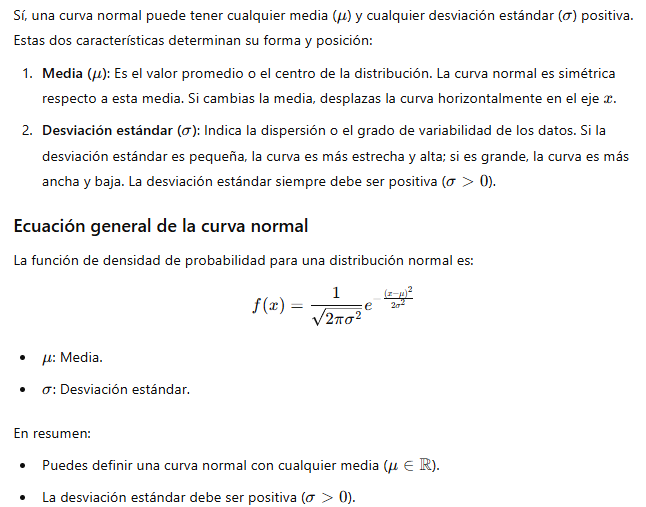

## Ejercicio 12

In [78]:
def trans_Z(valor_z:float) -> int:
    Z = round(50 + 10 * (valor_z))
    return Z

datos_ej12 = [-2.43, 1.5, -0.5, 0]
for Z in [trans_Z(z) for z in datos_ej12]:
    print("Valor Z:",Z)

Valor Z: 26
Valor Z: 65
Valor Z: 45
Valor Z: 50


## Ejercicio 13

In [82]:
def volver_z(valor_Z: int) -> float:
    z = (valor_Z - 500)/100
    return z

datos_ej12 = [230, 500, 780, 640, 460]
for z in [volver_z(Z) for Z in datos_ej12]:
    print("Valor z:",z)

Valor z: -2.7
Valor z: 0.0
Valor z: 2.8
Valor z: 1.4
Valor z: -0.4


## Ejercicio 14

Cuanto menor sea la desviacion estandar, menores seran las desviaciones de las calificaciones respecto a la media. Cuando se usa la media para predecir una calificacion dada, el error sera menor, en promedio, cuando la desviacion estandar sea pequefia. En el caso limite, cuando s = 0.00, todas las calificaciones son identicas, No hay error en la prediccion. 